<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/03_41_Principal_Component_Analysis_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principal Component Analysis (PCA)


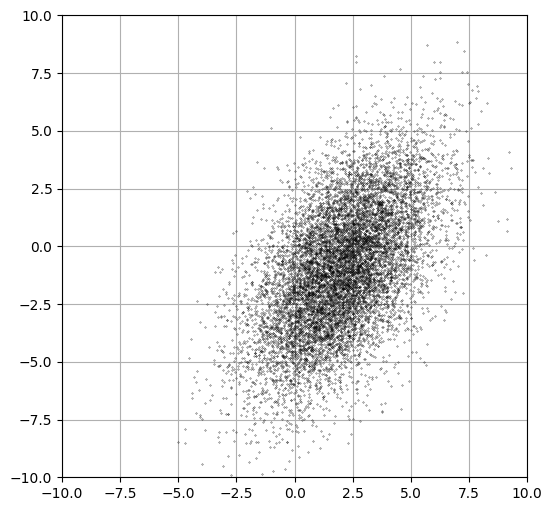

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [6, 6]

## Parameters to generate data for testing.

# Center of data (mean)
xC = np.array([2, -1])

# Scaling at the principal axes
sig = np.array([3, 1.5])

# Rotation matrix, R rotates points in the xy plane counterclockwise through
# an angle θ about the origin of a two-dimensional Cartesian coordinate system.

# Rotate cloud by 60 deg.
theta = np.pi/3
#theta = 0.0

# Rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

# Create 10,000 points
nPoints = 10000

### Create random points, scale, rotate and translate
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))

fig = plt.figure()

x = X[0,:]
y = X[1,:]

plt.plot(x, y, '.', color='k', markersize=0.5)

plt.grid()
plt.xlim((-10, 10))
plt.ylim((-10, 10))

plt.show()

Xavg (for translation, or center of the data (mean)):
 [ 2.00955092 -0.98188753]
U (rotation matrix or directions of the principal components): 
 [[-0.50197993 -0.86487927]
 [-0.86487927  0.50197993]]
S (scaling or variance along the principal components ): 
 [3.01579277 1.51089538]


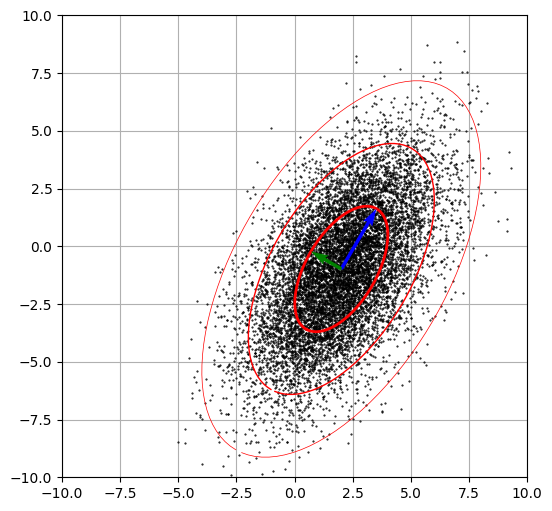

In [10]:
# PCA
# X[2 x 10,000] is a matrix of the point cloud.

# Compute the mean of the rows
Xavg = np.mean(X,axis=1)
print("Xavg (for translation, or center of the data (mean)):\n",Xavg)

# Mean-subtracted data matrix for PCA
B = X - np.tile(Xavg,(nPoints,1)).T


# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=0)
#U, S, VT = np.linalg.svd(B,full_matrices=0)

fig = plt.figure()

x = X[0,:]
y = X[1,:]

plt.plot(x, y, '.', color='k',markersize=1)   # Plot data to overlay PCA
plt.grid()
plt.xlim((-10, 10))
plt.ylim((-10, 10))

# Theta to plot confidence intervals 0 - 2pi, 100 points.
theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
# Creates a circle at the origin using np.array([np.cos(theta),np.sin(theta)])
# scale x and y axis using singular values, resulting an ellipse
# rotate the resulting ellipse with the U matrix.
# U @ np.diag(S) represents the principal components
Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

print("U (rotation matrix or directions of the principal components): \n", U)
print("S (scaling or variance along the principal components ): \n", S)

# For plotting, the mean of the X axis is added to Xstd to translate the center
# from origin to the center of the data X
plt.plot(Xavg[0] +   Xstd[0,:], Xavg[1] +   Xstd[1,:],'-',color='r',linewidth=2)
plt.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',linewidth=1)
plt.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',linewidth=0.5)

# Plot the directions of principle components
# Define the origin of the vector
origin = np.array([Xavg[0], Xavg[1]])
#print(origin)

# Calculate the vector components
# add a minus sign it to adjust the vector's direction.
v1_x = (-1) * U[0, 0] * S[0]
v1_y = (-1) * U[1, 0] * S[0]
# Plotting the vector with plt.quiver
plt.quiver(origin[0], origin[1], v1_x, v1_y, angles='xy', scale_units='xy', scale=1, color='blue', zorder=2)

# Calculate the vector components
v2_x =  U[0, 1] * S[1]
v2_y =  U[1, 1] * S[1]
# Plotting the vector with plt.quiver
plt.quiver(origin[0], origin[1], v2_x, v2_y, angles='xy', scale_units='xy', scale=1, color='green', zorder=2)

plt.show()